In [19]:
import os
import tensorflow as tf
from tensorflow.keras import preprocessing, models
from Utils import preprocessutils, graphutils
import pandas as pd

import matplotlib.pyplot as plt
import wget
import zipfile

In [3]:
train_dir_101_classes = "101_food_classes_10_percent/train"
test_dir = "101_food_classes_10_percent/test/"

In [4]:
IMG_SIZE = (224, 224)
test_data = preprocessing.image_dataset_from_directory(test_dir,
                                                       label_mode="categorical",
                                                       image_size=IMG_SIZE,
                                                       shuffle=False)


Found 25250 files belonging to 101 classes.


In [5]:
y_labels = []
for images, labels in test_data.unbatch():
    y_labels.append(labels.numpy().argmax())

class_names = preprocessutils.get_classes(train_dir_101_classes)

## Load model

In [6]:
model = models.load_model("06_101_food_class_10_percent_saved_big_dog_model")

In [7]:
preds_probs = model.predict(test_data, verbose=1)
pred_classes = preds_probs.argmax(axis=1)

790/790 [==============================] - 57s 66ms/step

In [8]:
filepaths = []
for filepath in test_data.list_files(test_dir + "*/*.jpg", shuffle=False):
    filepaths.append(filepath.numpy())

In [9]:
# create a DataFrame of different parameters for each test img
pred_df = pd.DataFrame({"img_pat": filepaths,
                        "y_true": y_labels,
                        "y_pred": pred_classes,
                        "pred_conf": preds_probs.max(axis=1),
                        "y_true_classname": [class_names[i] for i in y_labels],
                        "y_pred_classname": [class_names[i] for i in pred_classes]})

In [10]:
pred_df["pred_correct"] = pred_df["y_true"] == pred_df["y_pred"]

Sort our DataFrame to have the most wrong predictions at the top

In [11]:
top_100_wrong = pred_df[pred_df["pred_correct"]==False].sort_values("pred_conf", ascending=False)[:100]

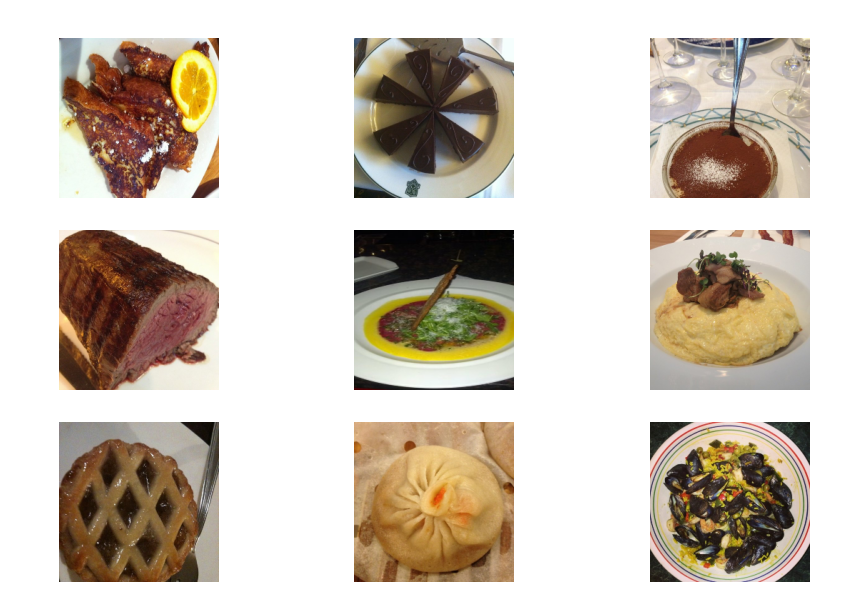

In [12]:
images_to_view = 9
start_index = 20
plt.figure(figsize=(15, 10))
for i, row in enumerate(top_100_wrong[start_index:start_index+images_to_view].itertuples()):
    plt.subplot(3,3, i+1)
    img = preprocessutils.load_and_prep_image(row[1], scale=False)
    _, _, _, _, pred_prob, y_true_classname, y_pred_classname, _ = row
    plt.imshow(img/255.)
    plt.title(f"actual: {y_true_classname}, pred: {y_pred_classname}, \nprob: {pred_prob}", c="w")
    plt.axis(False)
plt.show()


Test the big dog model on our custom images


In [13]:
url = "https://storage.googleapis.com/ztm_tf_course/food_vision/custom_food_images.zip"
wget.download(url)

zip_ref = zipfile.ZipFile("custom_food_images.zip")
zip_ref.extractall()
zip_ref.close()

In [14]:
custom_food_images = ["custom_food_images/" + img_path for img_path in os.listdir("custom_food_images/")]
custom_food_images

['custom_food_images/chicken_wings.jpeg',
 'custom_food_images/hamburger.jpeg',
 'custom_food_images/pizza-dad.jpeg',
 'custom_food_images/ramen.jpeg',
 'custom_food_images/steak.jpeg',
 'custom_food_images/sushi.jpeg']

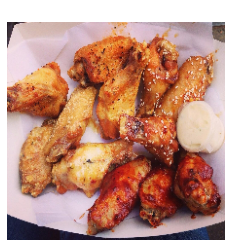

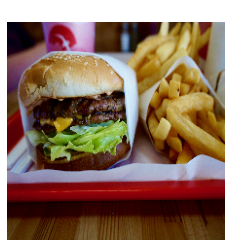

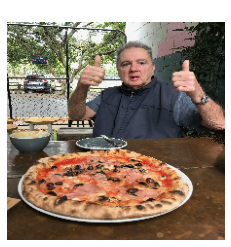

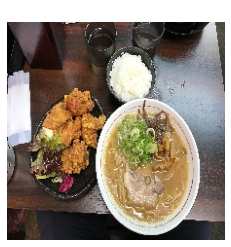

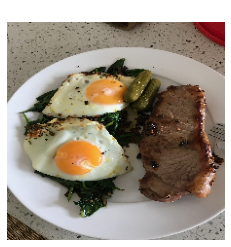

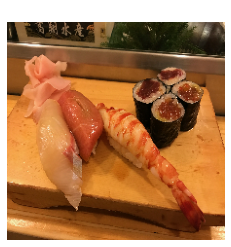

In [24]:
for img in custom_food_images:
    img = preprocessutils.load_and_prep_image(img, scale=False)
    pred_prob = model.predict(tf.expand_dims(img, axis=0))
    pred_class = class_names[pred_prob.argmax()]
    # plt.subplot(2,3, i+1)
    plt.figure()
    plt.imshow(img/255.)
    plt.title(f"pred: {pred_class}, prob: {pred_prob.max():.2f}", c="w")
    plt.axis(False)


plt.show()

